<a href="https://colab.research.google.com/github/MARYSALOMY/HOTEL-BOOKING-ANALYSIS/blob/main/Hotel_Booking_Analysis_Mary_Salomy_Alex_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!


 Explore and analyze the data to discover important factors that govern the bookings. 

# **Performing EXPLORATORY DATA ANALYSIS of HOTEL BOOKING with python to get insights from the data.**

**Importing necessary packages and mounting the Google Drive**

In [1]:
# importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# To display maximun columns of the dataset
pd.pandas.set_option('display.max_columns',None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***DATA PREPROCESSING***

In [5]:
# Importing the dataset from the drive

hotel_booking=pd.read_csv('/content/drive/My Drive/Hotel Booking Analysis - Mary Salomy Alex/Hotel Bookings.csv')

**Displaying the dataset.**

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made,arrival date, length of stay, the number of adults, children, and/or babies,meals opted and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. The time period of the dataset is between 2015-2017.


In [6]:
# Displays the first 5 rows of the Dataset
hotel_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
# Displays the last 5 rows of the Dataset
hotel_booking.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07



**Creating a copy of the dataset inorder to preprocess so that the orginal remains unaltered**

In [8]:
# Creating a copy 
hotel_df = hotel_booking.copy()

In [9]:
# Determining the size of the DataFrame
hotel_df.shape

(119390, 32)

DataFrame contains 32 columns and 119390 rows; i.e The given dataset contains 119390 observations and 32 features.

# **DEFINING BUSINESS QUESTIONS**

Knowing and understanding customer needs is at the centre of every successful business, whether it sells directly to individuals or other businesses. Once you have this knowledge, you can use it to persuade potential and existing customers that buying from you is in their best interests. 


**Here we arer defining the business questions in two ways:**

***A) Customer Point of View :***
 This analysis helps us to understand various preference and interests of the customers so that the Hotel Owners or Managers could make changes in future  accordingly in order to attract the customers for more booking.

***B) Hotel Point of View :***
 This analysis helps us to understand the cancellation aspects occured during the given period.

**A)  CUSTOMER POINT OF VIEW**

1. What are the preference of customers over City Hotel and Resort Hotel ?
2. Which month is the peak season for hotel booking ?
3. Country from which most customers visit ?
4. What are the preferences of customer in Meal ?
5. What is the probability of getting the reserved room type ?
6. Does the guest book hotel for group or single purpose ?

# **UNDERSTANDING THE DATASET**

The given dataset contains 32 columns and 119390 rows.

**DATA SUMMARY**

1. hotel : Type of hotels - City Hotel / Resort Hotel
2. is_cancelled : whether cancelled or not. cancelled denoted as 1 and not cancelled denoted as 0
3. lead_time : number of days before the arrival after booking
4. arrival_date_year :year of booking namely - 2015,2016,2017
5. arrival_date_month : month of booking
6. arrival_date_week_number :week number of the year
7. arrival_date_day_of_month : arrival month date
8. stays_in_weekend_nights : numbers of weekends[Saturday or Sunday] customer stayed
9. stays_in_week_nights : number of weekdays[between Monday to Friday] guess stayed
10. adults : number of adults
11. children : number of children
12. babies : number of babies
13. meal : Types of meal booked. BB – Breakfast,HB-2 meals, FB-full day meal
14. country : the country of the customer
15. market_segment : TA – travel agents, TO-Tour operators
16. distribution_channel : booking distribution channel
17. is_repeated_guest : whether the customer is a repeated guest or not
18. previous_cancellations : past cancellations prior to current booking
19. previous_bookings_not_cancelled: not cancelled in the past
20. reserved_room_type : Rooms types categorised as : 'C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'
21. assigned_room_type : Room types categoried as :'C', 'A', 'D', 'E', 'G', 'F','H', 'L' , 'P','B','I', 'K'
22. booking_changes : number of changes made in booking
23. deposit_type : Types of deposit - ['No Deposit', 'Refundable', 'Non Refund']
24. agent : agent id
25. company : company id
26. days_in_waiting_list : number of days in waitng list
27. customer_type : 'Transient', 'Contract', 'Transient-Party', 'Group'
28. adr : average daily rate
29. required_car_parking_spaces
30. total_special_requests
31. reservation_status : 'Check-Out', 'Canceled', 'No-Show'
32. reservation_status_date : Reservation date



**Data Cleansing**



After defining the business questions, we can find that there are columns that are not relevant for our analysis. Removing the columns that are not required for the analysis.

In [10]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Dropping the columns such as : 'babies' , 'market_segment' ,'reservation_status_date' , 'reservation_status' , 'total_of_special_requests' and 'required_car_parking_spaces'

These columns do not have much links to the analysis we are going to perform and hence deleting them in the beginning itself.

In [11]:
# Dropping the columns that are not required for our analysis
hotel_df.drop(['babies','market_segment','reservation_status_date','reservation_status','total_of_special_requests',
               'required_car_parking_spaces','agent'],axis = 1,inplace = True)

In [12]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'meal', 'country',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'company',
       'days_in_waiting_list', 'customer_type', 'adr'],
      dtype='object')

 **Checking if our data contains any null or missing values**

In [13]:
hotel_df.isnull().sum().sort_values(ascending=False)

company                           112593
country                              488
children                               4
distribution_channel                   0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
assigned_room_type                     0
reserved_room_type                     0
previous_bookings_not_canceled         0
previous_cancellations                 0
is_repeated_guest                      0
hotel                                  0
is_canceled                            0
meal                                   0
adults                                 0
stays_in_week_nights                   0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
arrival_date_week_number               0
arrival_date_month                     0
arrival_date_year                      0
lead_time                              0
adr             

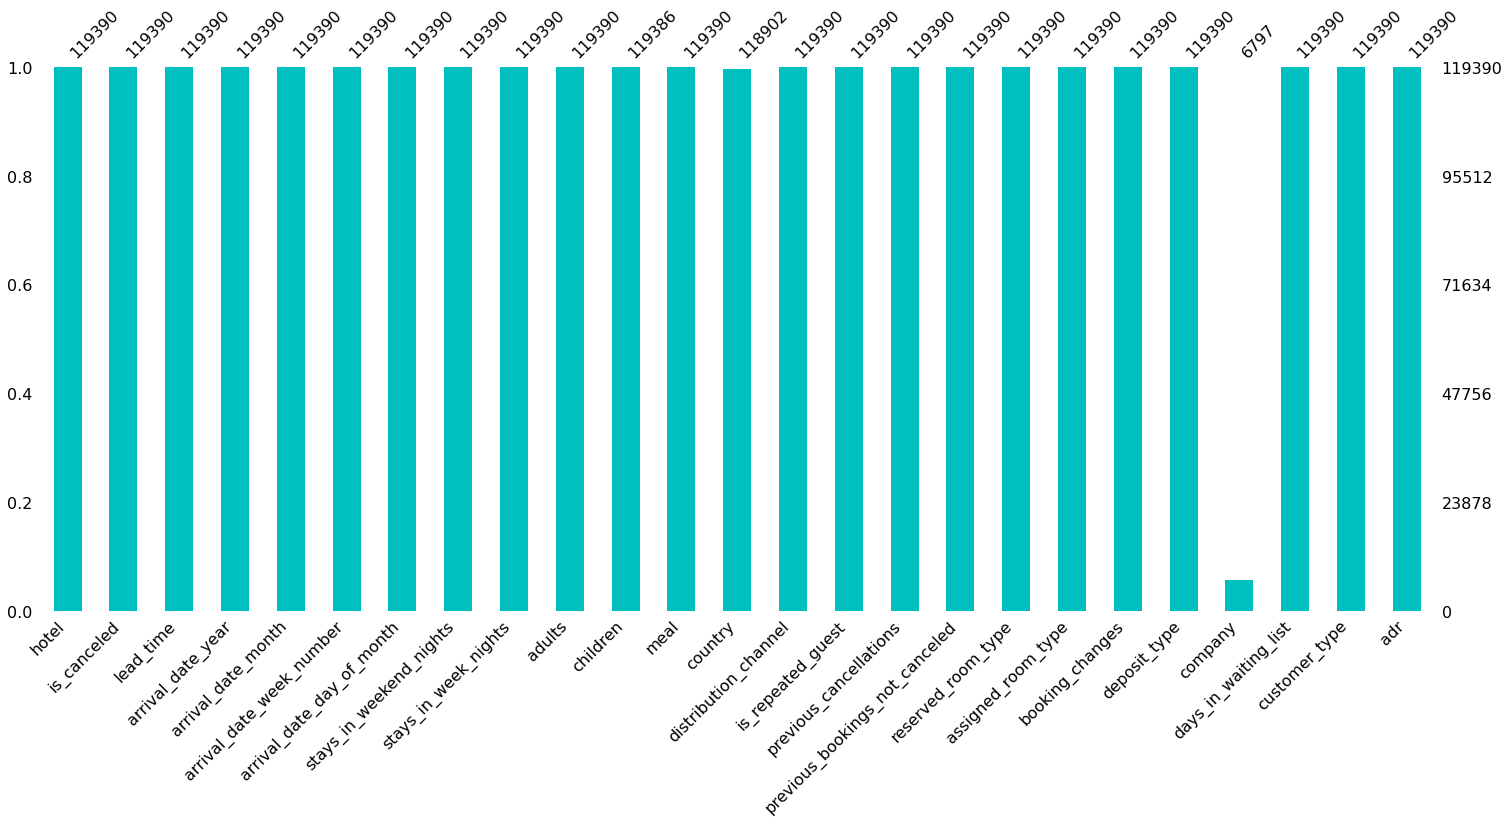

In [14]:
# Plot to show the missing data in detail
import missingno as msno
msno.bar(hotel_df, color = 'c')
plt.show()

Found 3 columns with missing values:
**company,country & children**.

Most of the data in 'company' column is missing and so ,this feature needs to be eliminated.

In [15]:
# code for droping company column
hotel_df.drop(['company'],axis=1,inplace = True)

'country' column contains country codes representing different countries. It is a categorical feature. Missing data of a 'country' column will be replaced with another category named 'Others' so that the data remains unaltered

In [16]:
# Filling the null values with another category named as 'Others'
hotel_df['country'].fillna(('Others'),inplace = True)

Since the 'children' column contains the number of children and only 4 values are missing, replacing all the missing values with the median value.

In [17]:
# for missing children value, replacing it with rounded median value
hotel_df['children'].fillna(hotel_df.children.median(), inplace=True)

**Converting the datatype**

In [18]:
# Checking the Datatype and cross checking the null values
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  meal                            119390 non-null  object 
 12  country         

Now we can find that there are no null values and We see that there are 2 float64 columns, 13 int64 columns, and 9 object columns.

In [19]:
# Checking for unique values of children feature
hotel_df['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

The 'children' feature which is in float datatype have values in integers. Hence converting them to integer type.

In [20]:
hotel_df['children'] = hotel_df['children'].astype('int64')

In [21]:
hotel_df.dtypes.value_counts()

int64      14
object      9
float64     1
dtype: int64

# **Treating the outliers**

In [22]:
# Describes the numerical information of the DataFrame
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000


There are two types of outliers:

**Univariate outliers**: Outliers are the data points that are away from the expected range of values. In Univariate analysis single variable is considered to detect outliers.

**Multivariate outliers**: These outliers are dependent on the correlation between two variables.

**Univariate Analysis**
In the univariate analysis, we consider only a single variable that can be numerical or categorical. For numerical continue variables, we can use a box plot or histogram or scatter plot, and for categorical data, we commonly preferred bar plots or pie charts.

**Bivariate Analysis**
We can handle bivariate analysis in 3 ways:

**Numeric and Numeric:**
In Numeric-Numeric analysis, we compare both numeric variables. The scatter plots, pair plots, and correlation matrics compare two numeric columns.

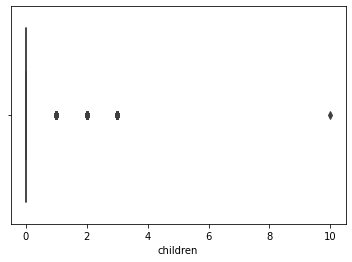

In [23]:
# Boxplot to detect outliers of Children feature
sns.boxplot(hotel_df['children'])

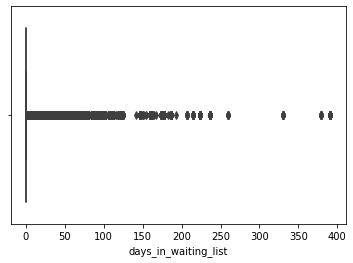

In [24]:
# Boxplot to detect outliers of days_in_waiting_list feature
sns.boxplot(hotel_df['days_in_waiting_list'])

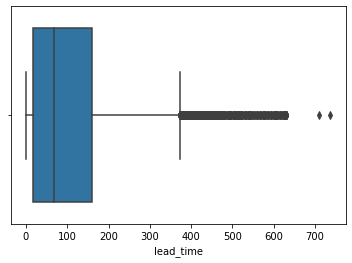

In [25]:
# Boxplot to detect outliers of lead_time
sns.boxplot(hotel_df['lead_time'])

Text(0.5, 0, 'adr Data')

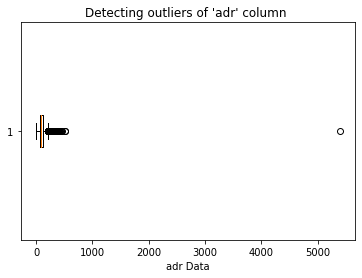

In [26]:
# Detecting the outlier of 'adr' using boxplot
plt.boxplot(hotel_df['adr'], vert=False)
plt.title("Detecting outliers of 'adr' column ")
plt.xlabel('adr Data')

From the numerical description and boxplotting we can find that: 

* For the children column, there is one instance where there 
are 10 children but most of the other values are within 4. We might want to point this out to the clients to verify whether it might be an outlier. 
* The days_in_waiting_list column has values as high as 400. This means that the waiting time has been more than 1 year. We might need to communicate this to client and decide a method to limit this number for further analysis.
*  The lead_time colum also has values above 400, which means the number of days before the arrival after booking is more than a year.We might need to communicate this also to client and decide a method to limit this number for further analysis.
* In the adr column, only one value lies beyond 5000 which must be an outlier. We will remove this value with the median if not which might skew the summary statistics 
* For rest of the columns, we do not see anything unusual

In [27]:
# Converting the maximum value of the column 'adr' to that of the median value.
adr_median = hotel_df['adr'].median()
adr_max = hotel_df['adr'].max()
hotel_df['adr'].replace(adr_max,adr_median,inplace=True)

**Clubbing the relatable data**

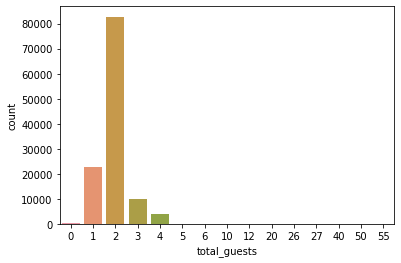

In [28]:
# Combining the adults and children as total_guests
hotel_df['total_guests'] = pd.DataFrame(hotel_df['adults']+hotel_df['children']) 
sns.countplot(x='total_guests', data= hotel_df)


From this plot we can better see the distribution of the number of guests per reservation. Most records have 2 guests per stay, with 1,3, and 4 guests rounding out the top 4 as expected. Perhaps the most interesting part of this plot are the upper extremes. 55 guests in one reservation!

**Encoding the relevant categorical data as numerical**

In [29]:
hotel_df['reserved_room_type'] = hotel_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,'L': 7, 'B': 8})

hotel_df['assigned_room_type'] = hotel_df['assigned_room_type'].map({'C': 0, 'A': 1, 'D': 2, 
                                                                     'E': 3, 'G': 4, 'F': 5, 'H': 6,'L': 7, 'B': 8,'I':9,'P':10,'K':11})

hotel_df['deposit_type'] = hotel_df['deposit_type'].map({'No Deposit': 0,  'Non Refund':  1,'Refundable': 2})


**Correlation Matrix**

A correlation matrix glimpses the correlation between different variables. The correlation between two variables is determined by the correlation coefficient.



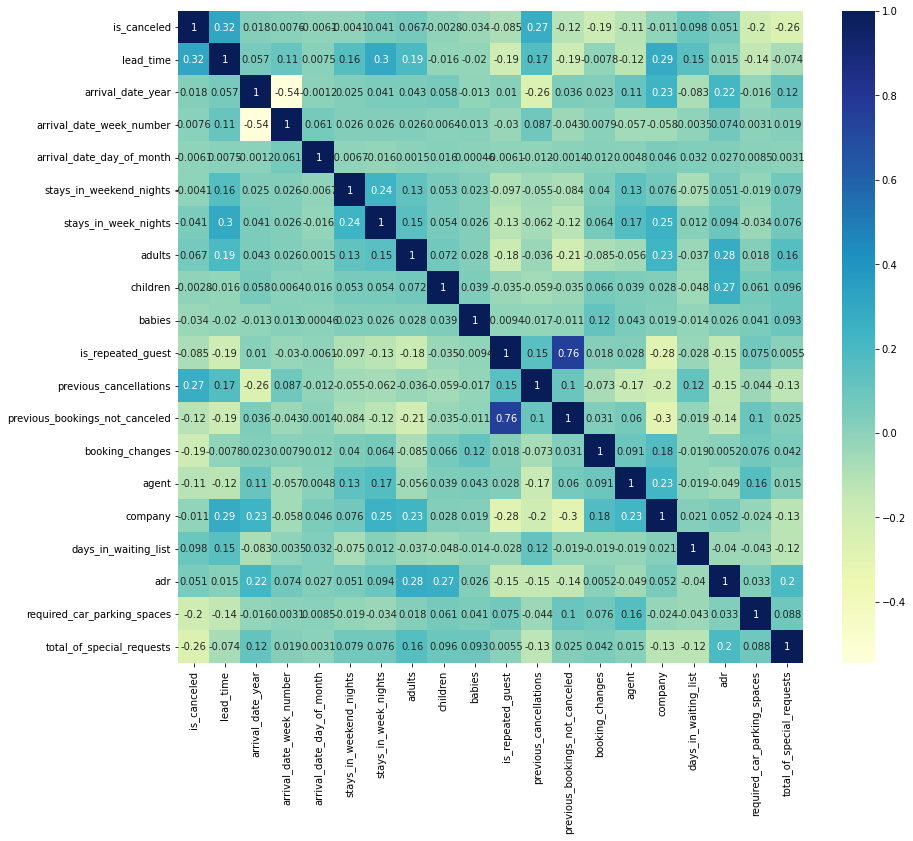

In [30]:
# Figuring a correlation matrix using spearman method
fig, ax = plt.subplots(figsize=(14,12))
corr = hotel_booking.corr(method = 'spearman')
sns.heatmap(corr, ax=ax, annot = True,cmap ="YlGnBu")
plt.show()

The above correlation matrix shows positive or negative relationships between the features. 

There is a negative correlation between the arrival_date_year & arrival_date_week_number. But since both denotes the specific year of booking and week in which the date belongs we can ignore it.

On the other hand is_canceled & lead_time feature also shows a slight positive correlation, which can cause a wrong prediction or overfitting. In order to prevent this situation, we need to check for outliers.

Another relationship is between the is_repeated_guest and the previous_bookings_not_canceled features. This might indicate that the repeated guests have more chance to do the cancellations as compared to the new guests.

## **DATA EVALUATION AND ANALYSIS**

# **Finding the hotel booking demand from the customer point of view based on the data.** 

# **1. What are the preference of customers over City hotel and Resort hotel ?**

There are two types of Hotel. City Hotel and Resort Hotel. 

In [31]:
# Finding the percentage of Hotels booked for City Hotel and Resort Hotel

hotel_type = pd.DataFrame(hotel_df['hotel'].value_counts())
percentage = hotel_type['hotel']/hotel_type['hotel'].sum()*100
print(round(percentage,2))

City Hotel      66.45
Resort Hotel    33.55
Name: hotel, dtype: float64


The percentage of customers prefers to book City Hotel is 66.45% and that of Resort Hotel is 33.55%

Text(0.5, 1.0, 'Types of Hotel')

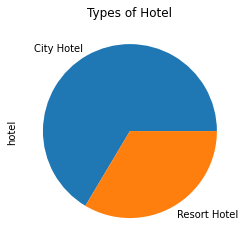

In [32]:
# Using Pie Chart to display the City Hotel and Resort Hotel booking percentage
percentage.plot(kind='pie')
plt.title('Types of Hotel')

Bookings for City Hotel is more than that of the Resort Hotel and hence we can conclude that :

**Customers prefer City Hotel than Resort Hotel.**

# **2. Which month is the peak season for hotel booking ?**

Now we can check for which month the customers book the hotel the most.

In [33]:
# Count of Bookings made throughout the months
hotel_df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

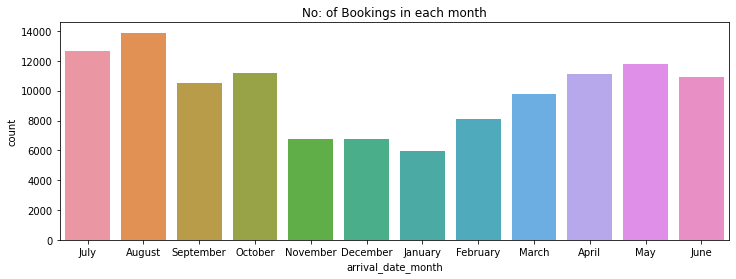

In [34]:
# Displaying the data using the plot
plt.figure(figsize=(12,4))
sns.countplot(x='arrival_date_month', data= hotel_df)
plt.title('No: of Bookings in each month')
plt.show()

The total number of customers arrived in the month of August is high and lowest for the month of January. The customers mainly prefers the month of August for their stay in Hotel and January is the least preferred month.

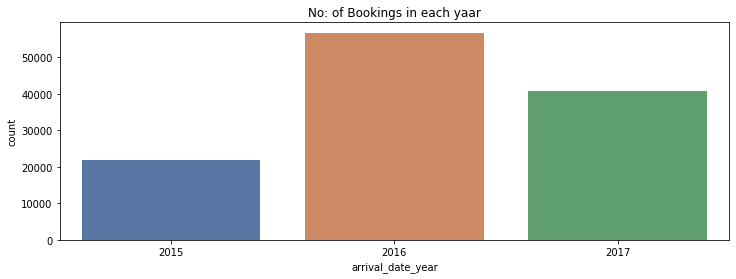

In [35]:
# Displaying the data using the plot
plt.figure(figsize=(12,4))
sns.countplot(x='arrival_date_year' , data= hotel_df, palette = 'deep')
plt.title('No: of Bookings in each yaar')
plt.show()

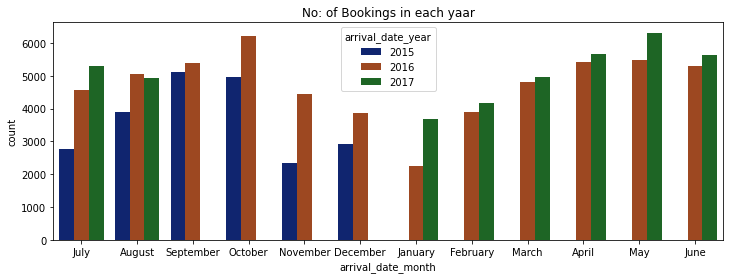

In [36]:
# Displaying the data using the plot
plt.figure(figsize=(12,4))
sns.countplot(x= 'arrival_date_month', hue ='arrival_date_year' , data= hotel_df, palette = 'dark')
plt.title('No: of Bookings in each yaar')
plt.show()



Comparing the values we can assume that the rate of booking does not increase proportionately over the years.

We can also find that only on the month of July and August consecutive booking has done. And so **July and August are the peak season for Hotel Booking**.

# **3. Country from which most customers visit?**

In [37]:
hotel_df['country'].value_counts().head(5)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: country, dtype: int64

Text(0.5, 1.0, 'People from top travelling countries')

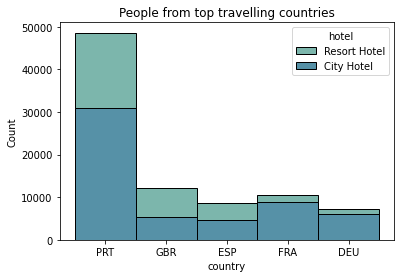

In [38]:
# Creating a dataframe of top five country list
top5_country = hotel_df[hotel_df['country'].isin(["PRT","GBR","FRA","ESP","DEU"])]
# Plotting the data against City Hotel or Resort Hotel type
sns.histplot(data=top5_country , x="country",hue = 'hotel', palette= 'crest' ,multiple="stack")
plt.title('People from top travelling countries')

Country with the code PRT has the highest number of travellers for booking a Hotel and they had opted for City Hotel compared to Resort Hotel

# **4. What are the preferences of customer in Meal ?** 

In [39]:
hotel_df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

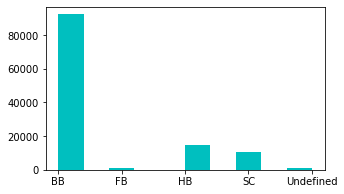

In [40]:
# Plotting meal column
hotel_df['meal'].hist(color = 'c', grid=False, figsize =(5,3))
plt.show()

Majority of the customers opt for Bed and Breakfast type meal preference during their stay.

# **5. Probability of getting the reserved room type?**

In [43]:
# Checking whether the reserved room type and assigned room type are same & finding its percentage to avail the probability
room_type = pd.DataFrame((hotel_df['reserved_room_type']==hotel_df['assigned_room_type']).value_counts()/
                         hotel_df['assigned_room_type'].value_counts().sum()*100, columns =['Percentage %'])
print(round(room_type,3))

       Percentage %
True         87.496
False        12.504


Text(0.5, 1.0, 'Percentage of getting the reserved room type')

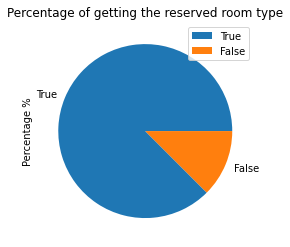

In [44]:
# Plotting a pie chart to establish the percentage of customers who recieved the reserved room type itself as their assigned room type.
room_type.plot(kind='pie', subplots = 'True')
plt.title('Percentage of getting the reserved room type')

The chance of getting the reserved room type for a customer is 
**87.506%**

# **6. Does the guests book hotel for group or single purpose?**

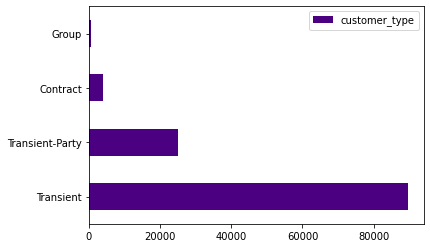

In [45]:
# Types of customer's booking purpose
customer = pd.DataFrame(hotel_df['customer_type'].value_counts())
customer.plot(kind='barh', y='customer_type',  color = 'indigo')

Customer type of booking shows high for Transient type & hence we can infer that a major type of guests prefer hotel for staying only a short time

# **Finding the hotel booking demand from the hotel point of view based on the data.** 

# **1. What is the cancellation rate of  City hotel over Resort hotel ?**

Let’s check the cancel column with hotel column and taking out the cancellation percentage.


In [46]:
# Evaluating the cancellation rate
cancellation_rate = pd.DataFrame(hotel_df['is_canceled'].value_counts()/hotel_df['hotel'].shape[0]*100)
cancellation_rate

,is_canceled
0,62.958372
1,37.041628


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45c88dbd90>],
      dtype=object)

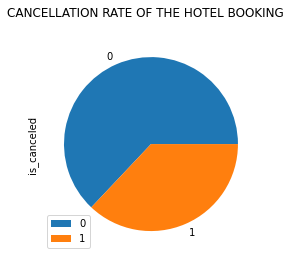

In [47]:
cancellation_rate.plot(kind='pie', subplots=True, title = 'CANCELLATION RATE OF THE HOTEL BOOKING')

'0' Indicates the non cancelled type and '1' indicates the cancelled type.
**The plot shows that 37% of the booking where cancelled.**

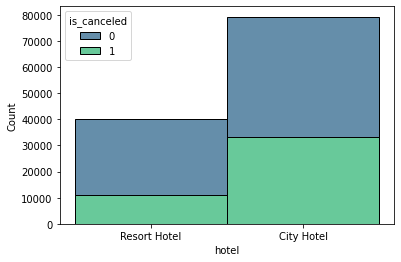

In [48]:
# Plotting to avail the cancellation rate of City Hotel & Resort Hotel
sns.histplot(data=hotel_df, x="hotel", hue="is_canceled",palette= 'viridis' ,multiple="stack")

From the above data we can see that the City Hotels have high cancellation rate because they have high booking rate than the Resort Hotel.

# **2. What is the Average Daily Rate per person over City Hotel and Resort Hotel**

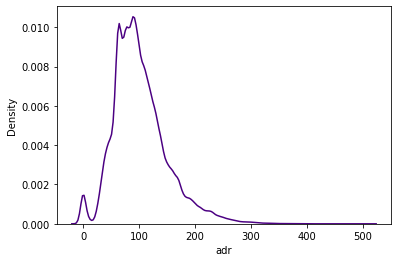

In [50]:
# Plotting Average Daily Rate 
sns.kdeplot(data=hotel_df['adr'],color = 'indigo')

In [51]:
# selecting all the rows without zero values
hotel_df = hotel_df.loc[(hotel_df.children != 0)|(hotel_df.adults != 0), :]
# Average hotel fees per person
hotel_df['adr_per_person'] = hotel_df['adr']/(hotel_df['adults'] + hotel_df['children'])
resort = hotel_df.loc[(hotel_df.is_canceled == 0) & (hotel_df.hotel == 'Resort Hotel'), 'adr_per_person'].mean()
city= hotel_df.loc[(hotel_df.is_canceled == 0) & (hotel_df.hotel == 'City Hotel'), 'adr_per_person'].mean()
print("The mean price of Resort hotel is {:.2f}".format(resort))
print("The mean price of city hotel is {:.2f}".format(city))

The mean price of Resort hotel is 47.49
The mean price of city hotel is 59.27
